<a href="https://colab.research.google.com/github/marconebhering/data-science/blob/main/Clusteriza%C3%A7%C3%A3o_de_Clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introdução**

Um dos principais desafios das empresas é entender quem são os seus clientes. Este entendimento é o que torna a oferta mais relevante, permitindo que produtos sejam modificados de acordo com as necessidades e comportamentos específicos de cada grupo de clientes.

#**Caso**

O objetivo deste estudo é prever como diferentes segmentos de clientes responderão a um determinado produto ou serviço a partir de um conjunto de dados coletados em uma campanha de marketing.

Ou seja, se trata de um *clustering* para resumir segmentos de clientes, baseados nas informações contidas no *dataset*.

#**Dataset**

Para o desenvolvimento deste estudo, será utilizado o dataset Customer Personality Analysis disponibilizado no Kaggle, no seguinte endereço:

[Dataset - Customer Personality Analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)

#**Análise Exploratória**

O objetivo principal da análise exploratória é ajudar a analisar os dados antes de fazer qualquer suposição. Ela pode ajudar na identificação de erros, de padrões presentes dos dados, detecção de desvios ou eventos anômalos, além de encontrar relações interessantes entre as variáveis.


##**Importação dos dados**



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib
import matplotlib.pyplot as plt, numpy as np
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics
from matplotlib import cm

In [ ]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


##**Dicionário de Variáveis**

###**Pessoas**

Variável | Descrição 
---------|-----------
ID | Identificador único do cliente
Year_Birth | Data de aniversário do cliente
Education | Nível de educação do cliente
Marital_Status | Estado civil do cliente
Income | Renda familiar anual do cliente
Kidhome | Nº de crianças na casa do cliente
Teenhome | Nº de adolescentes na casa do cliente 
Dt_Customer | Data de cadastro do cliente na empresa
Recency | Nº de dias desde a última compra do cliente
Complain | 1 se o cliente reclamou nos últimos dois anos, 0 senão


###**Produtos**

Variável | Descrição
---------|----------
MntWines | Quantia gasta em vinho nos últimos 2 anos
MntFruits | Quantia gasta em frutas nos últimos 2 anos
MntMeatProducts | Quantia gasta em carne nos últimos 2 anos
MntFishProducts | Quantia gasta em peixe nos últimos 2 anos
MntSweetProducts | Quantia gasta em doces nos últimos 2 anos
MntGoldProds | Quantia gasta em ouro nos últimos 2 anos

###**Promoção**

Variável | Descrição
---------|----------
NumDealsPurchases | Nº de compras feitas com desconto
AcceptedCmp1 | 1 se o cliente aceitou a oferta na 1ª campanha, 0 senão
AcceptedCmp2 | 1 se o cliente aceitou a oferta na 2ª campanha, 0 senão
AcceptedCmp3 | 1 se o cliente aceitou a oferta na 3ª campanha, 0 senão
AcceptedCmp4 | 1 se o cliente aceitou a oferta na 4ª campanha, 0 senão
AcceptedCmp5 | 1 se o cliente aceitou a oferta na 5ª campanha, 0 senão
Response | 1 se o cliente aceitou a oferta na última campanha, 0 senão

###**Local**

Variável | Descrição
---------|----------
NumWebPurchases | Nº de compras feitas através do site da empresa
NumCatalogPurchases | Nº de compras feitas usando um catálogo
NumStorePurchases | Nº de compras feitas diretamente na loja
NumWebVisitsMonth | Nº de visitas ao site da empresa no último mês

##Limpeza dos Dados

In [ ]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

A partir das informações acima, podemos concluir e observar que:

*   Existem valores ausentes em `Income`
*   `Dt_Customer` que indica a data em que um cliente ingressou no banco de dados não está no formato DateTime
*   Existem alguns dados categóricos em nosso quadro, pois existem variáveis em dtype: object. Portanto, precisaremos codificá-los em formato numérico posteriormente.

Em primeiro lugar, para os valores ausentes, serão removidas as entradas que possuem valores de `Income` ausentes.



In [ ]:
#Remoção NA
df = df.dropna()

Próximo passo é a criação de uma variável `Dt_Customer` que indica o nº de dias que um cliente está cadastrado no banco de dados. No entanto, para simplificar, será utilizado o valor em relação ao cliente mais recente no registro.

Portanto, para obter os valores, é preciso verificar as datas de registro mais recentes e mais antigas.

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
print('O Cliente mais novo cadastrou em:', df['Dt_Customer'].max())
print('O Cliente mais antigo cadastrou em:', df['Dt_Customer'].min())

O Cliente mais novo cadastrou em: 2014-12-06 00:00:00
O Cliente mais antigo cadastrou em: 2012-01-08 00:00:00


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Criação da variável `Customer_For`, que indica o número de dias que o cliente está cadastrado, em relação ao cliente mais novo.

In [ ]:
days = []
d1 = max(df['Dt_Customer'])
for i in df['Dt_Customer']:
    delta = d1 - i
    days.append(delta)
df['Customer_For'] = days
df['Customer_For'] = pd.to_numeric(df['Customer_For'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Exploração dos valores únicos dos atributos categóricos.

In [ ]:
print("Total de categorias no atributo Marital_Status:\n", df["Marital_Status"].value_counts(), "\n")
print("Total de categorias no atributo Education:\n", df["Education"].value_counts());

Total de categorias no atributo Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total de categorias no atributo Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


##*Feature Engineering*

A próxima parte consiste das seguintes etapas:

*   Extrair a Idade de um cliente pelo `Year_Birth`
*   Criar o atributo `Spent` indicando o valor total gasto pelo cliente em várias categorias ao longo de dois anos.
*   Criar o atributo `Living_With` de `Marital_Status` para extrair o estado civil dos casais.
*   Criar o atributo `Children` para indicar o total de crianças na casa, incluindo adolescentes.
*   Criar o atributo `Family_Size` que indica o total de pessoas na casa.
*   Criar o atributo `Is_Parent` para indicar se o cliente é pai/mãe.
*   Quebrar o atributo `Education` em 3 categorias para simplificar.
*   Eliminar atributos redundantes.

In [ ]:
#Idade do Cliente
df["Age"] = 2022-df["Year_Birth"]

#Valor Total Gasto em 2 Anos
df["Spent"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

#Estado Civil
df["Living_With"] = df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Total de Crianças
df["Children"] = df["Kidhome"] + df["Teenhome"]

#Total de Membros na casa
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]

#É pai/mãe
df["Is_Parent"] = np.where(df.Children > 0, 1, 0)

#Nível de Educação
df["Education"] = df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#Renomear Colunas
df=df.rename(columns = {"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropar atributos redundantes
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(to_drop, axis = 1)

##Estatísticas Descritivas

Com os novos atributos, podemos ter uma visão geral dos dados.

In [ ]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,4.423735e+16,53.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,2.008532e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,26.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,2.937600e+16,45.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,4.432320e+16,52.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,5.927040e+16,63.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,9.184320e+16,129.000000,2525.000000,3.000000,5.000000,1.000000


As estatísticas acima mostram algumas discrepâncias na renda (`Income`) e idade (`Age`).

Pode-se observar que a idade máxima é 128 anos, pois calculei a idade que seria hoje (ou seja, 2022) e os dados são antigos.

##Distribuição dos dados

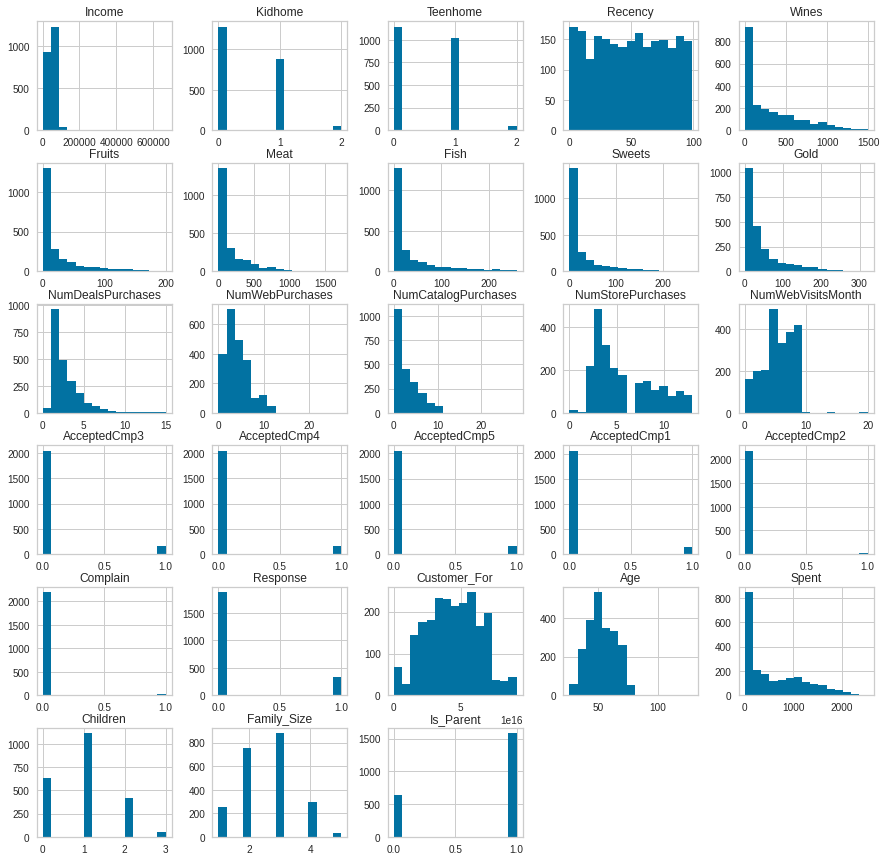

In [ ]:
df.hist(bins = 15, figsize = (15,15));

Ao visualizar a distribuição dos dados, podemos ver claramente a presença de outliers nos atributos `Income` e `Age`.

## Tratamento de *Outliers*

In [ ]:
#Dropping the outliers by setting a cap on Age and income. 
df = df[(df["Age"] < 80)]
df = df[(df["Income"] < 150000)]
print("O Total de Entradas após a remoção dos outliers é:", len(df))

O Total de Entradas após a remoção dos outliers é: 2203


##Matriz de Correlações

A seguir, vejamos a correlação entre os atributos. (Exceto os atributos categóricos).

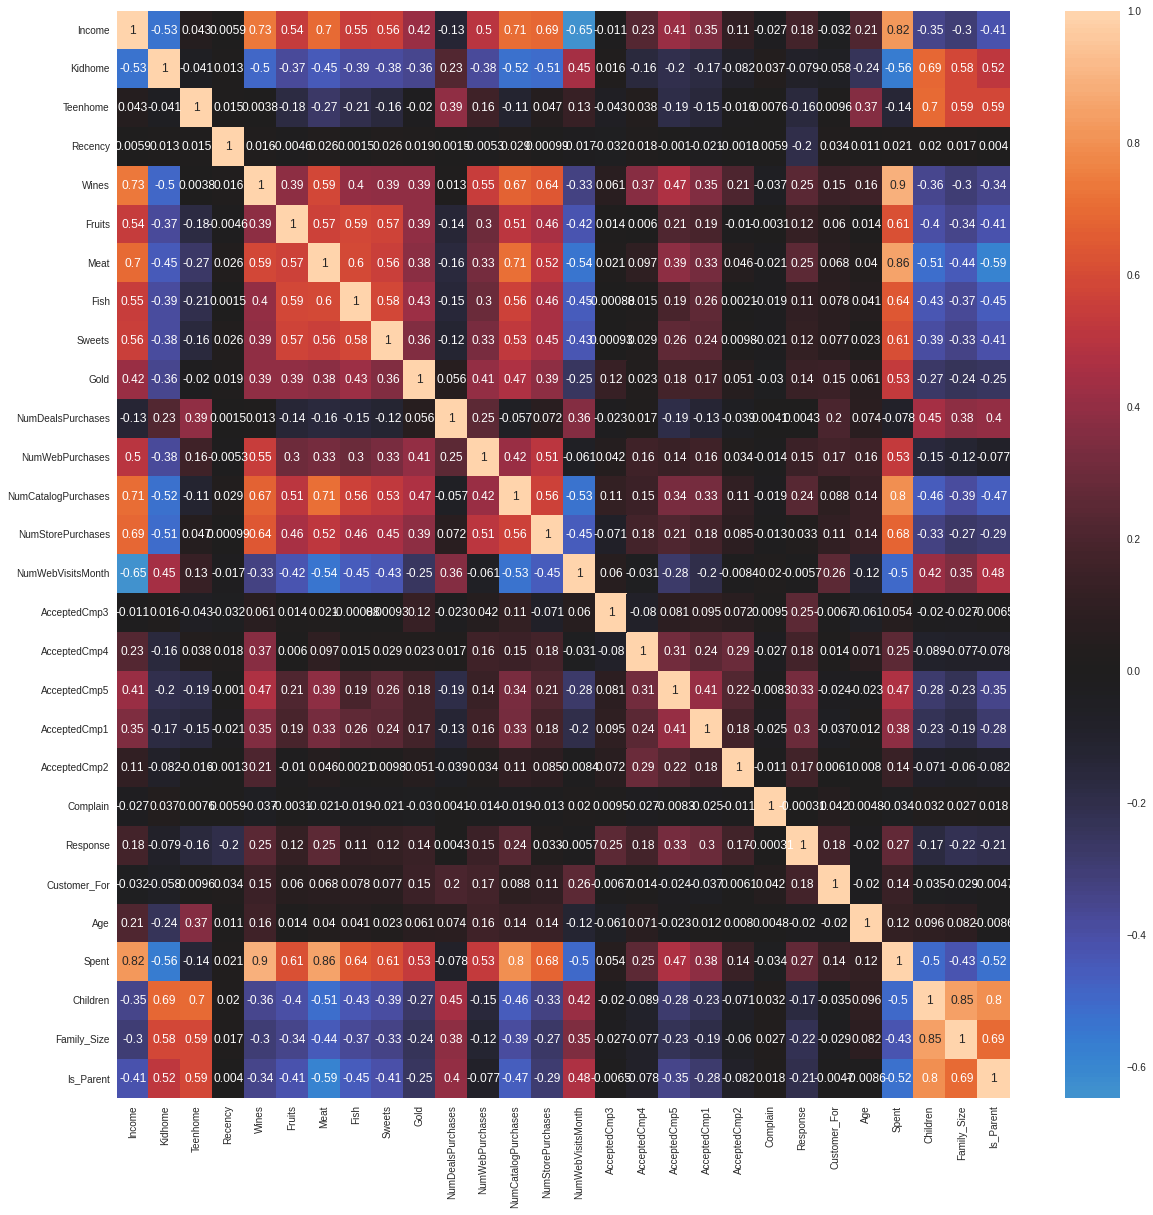

In [ ]:
corrmat = df.corr()
plt.figure(figsize = (20,20))  
sns.heatmap(corrmat, annot = True, center = 0)

#Pré-processamento dos Dados

Nesta seção, será realizado o pré-processamento dos dados para realizar operações de clustering.

As etapas a seguir são aplicadas para pré-processar os dados:

*   Codificar as características categóricas
*   Normalizar os atributos
*   Criar um subconjunto de dados para redução de dimensionalidade



In [ ]:
#Listar os Atributos Categóricos
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Atributos Categóricos no Dataset:", object_cols)

Atributos Categóricos no Dataset: ['Education', 'Living_With']


In [ ]:
#Codificar os Objetos
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)

In [ ]:
#Criar uma cópia dos dados
ds = df.copy()

In [ ]:
#Criar um subconjunto de dados descartando as variáveis alvo
cols_del = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)

In [ ]:
#Normalizar os dados
scaler = StandardScaler()
scaled_ds = pd.DataFrame(scaler.fit_transform(ds), columns=ds.columns )
scaled_ds.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.891547,0.315691,-0.824032,-0.931556,0.312119,0.977140,1.547997,1.751177,2.448192,1.479323,...,2.632595,-0.562814,0.688501,1.973429,1.021666,1.681989,-1.348012,-1.268088,-1.760718,-1.587189
1,-0.891547,-0.254096,1.037858,0.905702,-0.379560,-0.874999,-0.638584,-0.731679,-0.652304,-0.635835,...,-0.587818,-1.179669,-0.140334,-1.664138,1.278579,-0.964164,-1.348012,1.402656,0.447572,0.630045
2,-0.891547,0.966690,-0.824032,-0.931556,-0.794566,0.356792,0.567805,-0.175335,1.335661,-0.149592,...,-0.229995,1.287752,-0.554752,-0.172133,0.336564,0.282357,0.741833,-1.268088,-0.656573,-1.587189
3,-0.891547,-1.205738,1.037858,-0.931556,-0.794566,-0.874999,-0.563185,-0.667308,-0.506398,-0.587211,...,-0.945642,-0.562814,0.274084,-1.922121,-1.290552,-0.920894,0.741833,0.067284,0.447572,0.630045
4,0.571998,0.323180,1.037858,-0.931556,1.557139,-0.394155,0.417007,-0.216716,0.150178,-0.003719,...,0.127829,0.054041,-0.140334,-0.821392,-1.033639,-0.306787,0.741833,0.067284,0.447572,0.630045


##Redução da Dimensionalidade

Neste problema, existe uma grande quantidade de variáveis ou atributos, e muitos desses recursos estão correlacionados, o que torna redundante algumas informações.

Para resolver isso, utilizaremos a redução de dimensionalidade nos atributos selecionados, antes de colocá-los em um classificador.

A redução de dimensionalidade é o processo de redução do número de variáveis ​​aleatórias em consideração, por meio da obtenção de um conjunto de variáveis ​​principais.

A **análise de componentes principais (PCA)** é uma técnica para reduzir a dimensionalidade de tais conjuntos de dados, aumentando a interpretabilidade, mas ao mesmo tempo minimizando a perda de informação.

###Redução da Dimensionalidade com PCA

Para esse projeto, optaremos por reduzir as dimensões (atributos) para 3:

In [ ]:
pca = PCA(n_components = 3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(['col1','col2', 'col3']))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2203.0,5.160546e-17,2.903030,-6.044420,-2.568026,-0.790397,2.419942,7.514862
col2,2203.0,2.580273e-17,1.713041,-4.331330,-1.340545,-0.169227,1.243825,6.167824
col3,2203.0,2.580273e-17,1.221913,-3.545017,-0.835342,-0.030559,0.801305,6.740392


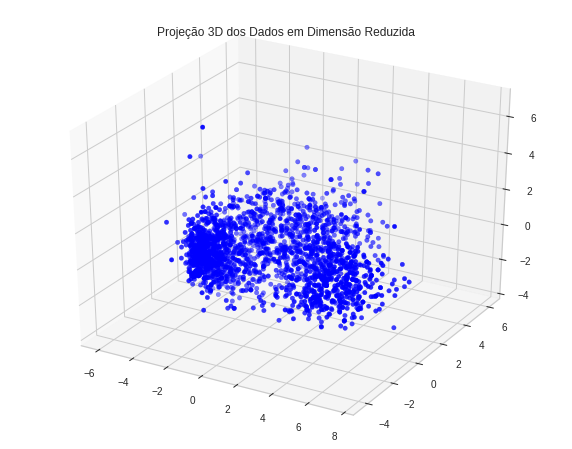

In [ ]:
#Projeção 3D dos dados em dimensão Reduzida
x = PCA_ds['col1']
y = PCA_ds['col2']
z = PCA_ds['col3']
#Plotagem
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c= 'blue', marker='o' )
ax.set_title('Projeção 3D dos Dados em Dimensão Reduzida')
plt.show()

#*Clustering*

Com os atributos reduzidos para as três dimensões, é hora de realizar o *cluster* dos dados.

A técnica utilizada para esse projeto é o agrupamento hierárquico, que baseia-se no tamanho e distância dos dados em um conjunto, e envolve a fusão de exemplos até que o número desejado de *clusters* seja alcançado.

##Etapas

*   **Método do Cotovelo** para determinar o número de clusters a serem formados
*   ***Clustering*** através de Agrupamento Hierárquico
*   Examinar os ***clusters*** através do gráfico de dispersão



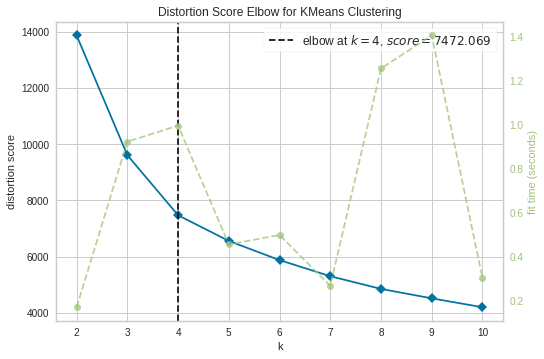

In [ ]:
Elbow_M = KElbowVisualizer(KMeans(), k = 10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

Pelo Método do Cotovelo, temos que o nº ótimo de clusters é 4, conforme indicado no gráfico acima.

Seguindo então com o ***clustering***:

In [ ]:
AC = AgglomerativeClustering(n_clusters = 4)

y_AC = AC.fit_predict(PCA_ds)
PCA_ds['Clusters'] = y_AC

df['Clusters'] = y_AC

Para examinar os ***clusters*** formados, vamos dar uma olhada na distribuição 3D.

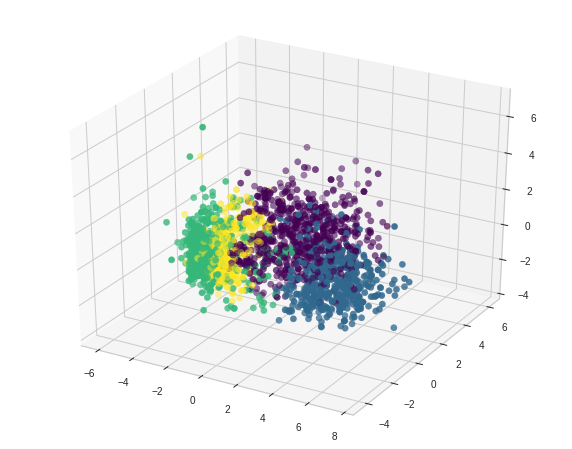

In [ ]:
#Plotando os clusters
fig = plt.figure(figsize = (10,8))
ax = plt.subplot(111, projection = '3d', label = 'bla')
ax.scatter(x, y, z, s = 40, c = PCA_ds['Clusters'], marker = 'o', cmap = plt.get_cmap('viridis') )
plt.show()

#Métodos de Avaliação

Uma vez que este é um modelo de aprendizado não supervisionado. Não temos rótulos para avaliar ou pontuar nosso modelo. O objetivo desta seção é estudar os padrões nos clusters formados e determinar a natureza dos padrões dos clusters.

Para isso, analisaremos os dados à luz de clusters por meio de análise exploratória de dados e tiraremos conclusões.

###Em primeiro lugar, vamos dar uma olhada na distribuição dos ***clusters***.

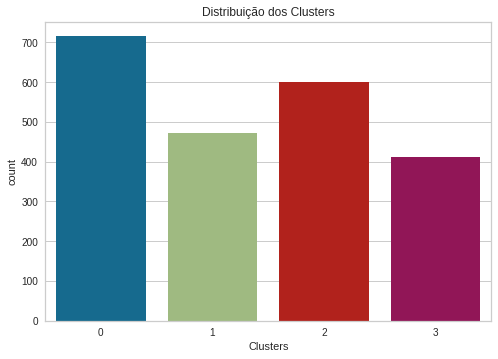

In [ ]:
pl = sns.countplot(x=df['Clusters'])
pl.set_title('Distribuição dos Clusters')
plt.show()


Os ***clusters*** parecem estar bem distribuídos.

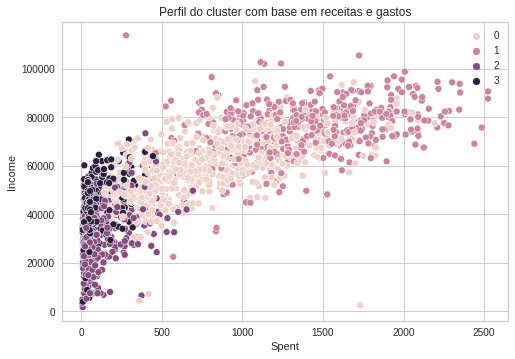

In [ ]:
pl = sns.scatterplot(data = df, x=df['Spent'], y = df['Income'], hue = df['Clusters'])
pl.set_title('Perfil do cluster com base em receitas e gastos')
plt.legend()
plt.show()

O gráfico de receita versus gasto mostra o padrão de clusters

*  Grupo 0: gastos altos e renda média
*  Grupo 1: alto gasto e alta renda
*  Grupo 2: baixo gasto e baixa renda
*  Grupo 3: baixo gasto e renda média

Em seguida, examinaremos a distribuição detalhada dos *clusters* de acordo com os vários produtos que temos informação: Vinhos, Frutas, Carnes, Peixes, Doces e Ouro.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 72.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 66.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


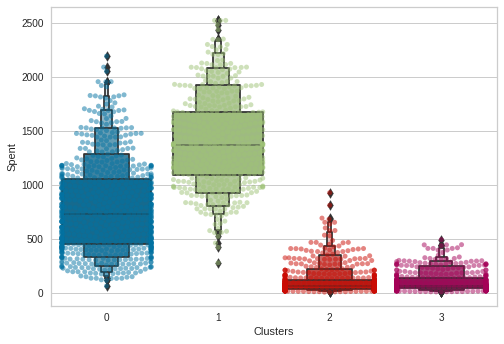

In [ ]:
plt.figure()
pl=sns.swarmplot(x = df['Clusters'], y = df['Spent'], alpha = 0.5 )
pl=sns.boxenplot(x = df['Clusters'], y = df['Spent'])
plt.show()

Vamos explorar a seguir como nossas campanhas se saíram no passado.

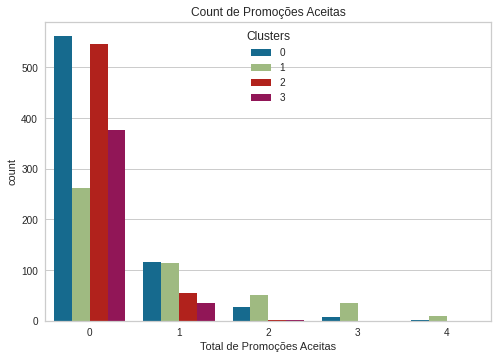

In [ ]:
df['Total_Promos'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

plt.figure()
pl = sns.countplot(x = df['Total_Promos'], hue = df['Clusters'])
pl.set_title('Count de Promoções Aceitas')
pl.set_xlabel('Total de Promoções Aceitas')
plt.show()

Até agora, não houve uma resposta esmagadora às campanhas. Muito poucos participantes no geral. E além disso, nenhuma parte participa de todas as 5. Talvez sejam necessárias campanhas mais bem direcionadas e bem planejadas para aumentar as vendas.

In [ ]:
#Plotando o nº de ofertas compradas
plt.figure()
pl = sns.boxenplot(y = df['NumDealsPurchases'], x = df['Clusters'])
pl.set_title('Número de Ofertas Compradas')
plt.show()

Ao contrário das campanhas, as ofertas oferecidas foram bem. O *cluster* 0 apresenta o melhor desempenho, seguido do *cluster* 3. No entanto, nosso *cluster* 1 de clientes não está muito interessado nos negócios. E nada parece atrair esmagadoramente o *cluster* 2


#Perfil

Agora que formamos os *clusters* e analisamos seus hábitos de compra. Vamos ver quem são todos esses agrupamentos. Para isso, vamos traçar o perfil dos *clusters* formados e chegar a uma conclusão sobre quem é nosso melhor cliente e quem precisa de mais atenção da equipe de marketing.

<Figure size 576x396 with 0 Axes>

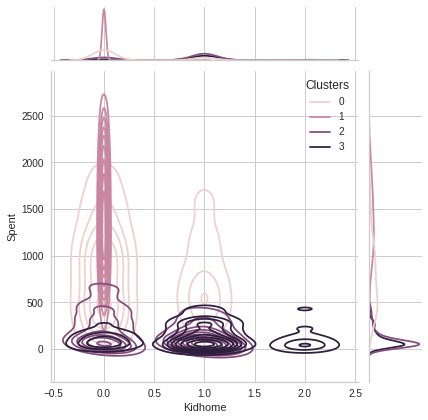

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 576x396 with 0 Axes>

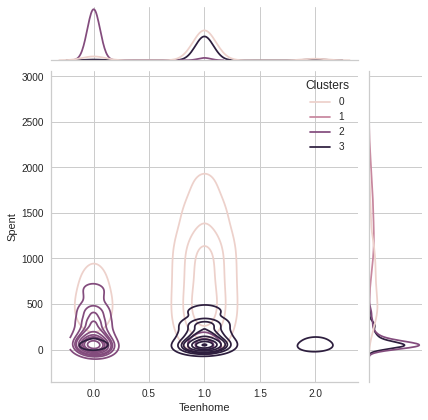

<Figure size 576x396 with 0 Axes>

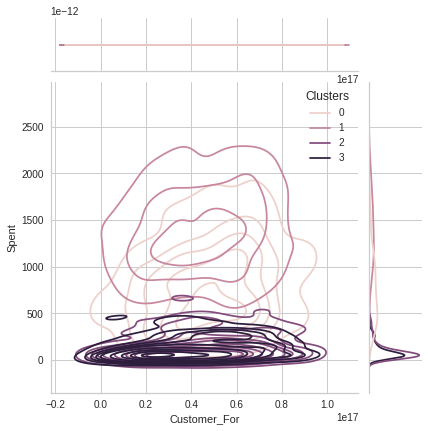

<Figure size 576x396 with 0 Axes>

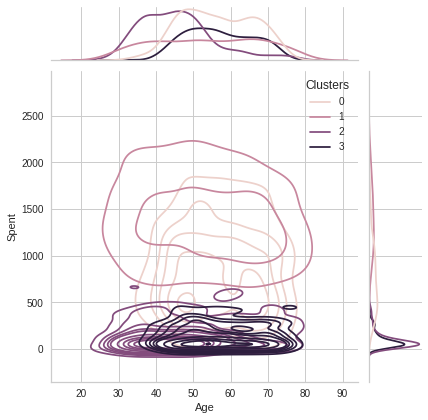

<Figure size 576x396 with 0 Axes>

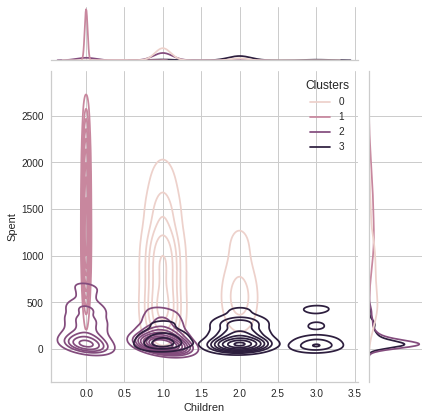

<Figure size 576x396 with 0 Axes>

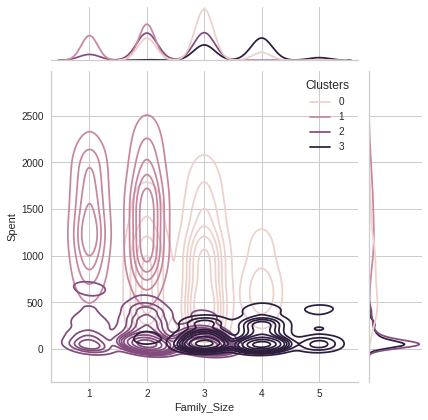

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 576x396 with 0 Axes>

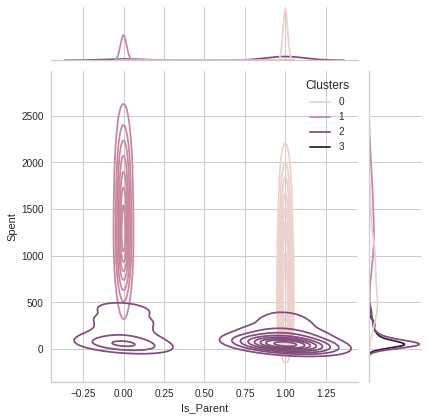

<Figure size 576x396 with 0 Axes>

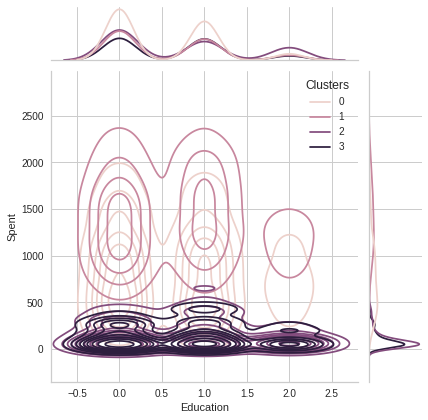

<Figure size 576x396 with 0 Axes>

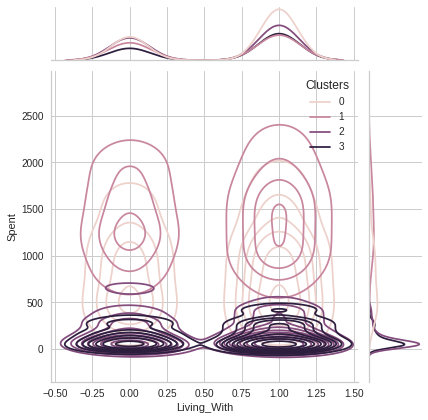

In [ ]:
Personal = ['Kidhome', 'Teenhome', 'Customer_For', 'Age', 'Children', 'Family_Size', 
            'Is_Parent', 'Education', 'Living_With']

for i in Personal:
    plt.figure()
    sns.jointplot(x = df[i], y = df['Spent'], hue = df['Clusters'], kind = 'kde')
    plt.show()

Pontos principais:

As seguintes informações podem ser observadas sobre os clientes em diferentes *clusters*.

##Cluster 0

*   São pais, definitivamente
*   Com no máximo 4 membros na família e no mínimo 2
*   Pais solteiros representam um subconjunto deste grupo
*   A maioria tem um adolescente em casa
*   Relativamente mais velhos


##Cluster 1

*  Definitivamente não são pais
*  Com no máximos 2 membros na família
*  Leve predominância de casais sobre solteiros
*  Abrange todas as idades
*  Grupo de alta renda

##Cluster 2

*   A maioria dos clientes são pais
*   No máximo 3 membros na família
*   A maioria com 1 criança, e não adolescentes
*   Relativamente mais novos

##Cluster 3

*  São pais
*  No máximo 5 membros na família e no mínimo 2
*  A maioria com adolescentes em casa
*  Relativamente mais velhos
*  Grupo de renda menor

#Conclusão

Neste projeto, foi feito um agrupamento não supervisionado. Onde usamos redução de dimensionalidade seguida de agrupamento aglomerativo. 

Foram criados 4 clusters, para segmentar o perfil dos clientes de acordo com a estrutura familiar, a renda e os gastos.

Informações que podem e devem ser utilizadas para otimizar o planejamento de marketing.